In [ ]:
import pandas as pd
import os

# Load the CSV files
dm_highlevel = pd.read_csv('./models/DMHighlevel_model_results.csv')
lowlevel = pd.read_csv('./models/lowlevel_model_results.csv')
# nodm_highlevel = pd.read_csv('./models/noDMHighlevel_model_results.csv')

# Load the additional file
final_results_025 = pd.read_csv('./models/Final_model_results_strength0.25.csv')
final_results = pd.read_csv('./models/Final_model_results_strength0.5.csv')
final_results_075 = pd.read_csv('./models/Final_model_results_strength0.75.csv')

# Display basic information about the loaded data
print("DM Highlevel Model Results Shape:", dm_highlevel.shape)
print("Lowlevel Model Results Shape:", lowlevel.shape)
print("Final Model Results Shape:", final_results.shape)



DM Highlevel Model Results Shape: (10, 17)
Lowlevel Model Results Shape: (30, 17)
Final Model Results Shape: (30, 17)


In [2]:
# Add 'has_dm' and 'is_highlevel' columns to each dataframe
dm_highlevel['has_dm'] = True
dm_highlevel['is_highlevel'] = True
dm_highlevel['img_strength'] = None

lowlevel['has_dm'] = False
lowlevel['is_highlevel'] = False
lowlevel['img_strength'] = None

# nodm_highlevel['has_dm'] = False
# nodm_highlevel['is_highlevel'] = True

final_results['has_dm'] = True
final_results['is_highlevel'] = True
#Add 'Final' to the model_name column
final_results['model_name'] = final_results['model_name'].apply(lambda x: f"Final05_{x}")

final_results_025['has_dm'] = True
final_results_025['is_highlevel'] = True
# Add 'Final' to the model_name column
final_results_025['model_name'] = final_results_025['model_name'].apply(lambda x: f"Final025_{x}")

final_results_075['has_dm'] = True
final_results_075['is_highlevel'] = True
# Add 'Final' to the model_name column
final_results_075['model_name'] = final_results_075['model_name'].apply(lambda x: f"Final075_{x}")

#final_results_075['img_strength'] = 0.75
# Add 'Final' to the model_name column

# Combine the three dataframes
combined = pd.concat([dm_highlevel, lowlevel,final_results_025,final_results,final_results_075], ignore_index=True)
# combined_EEG = pd.concat([final_results_025,final_results,final_results_075], ignore_index=True)

# Create descriptive model names based on DM and highlevel status
def modify_model_name(row):
    model_name = row['model_name']
    if row['is_highlevel']:
        if row['has_dm']:
            return f"{model_name}_DM_highlevel"
        else:
            return f"{model_name}_noDM_highlevel"
    return model_name

combined['model_name'] = combined.apply(modify_model_name, axis=1)

In [3]:
set(combined.model_name)

{'ATMS',
 'ATMS_DM_highlevel',
 'EEGConformer',
 'Final025_EEGConformer_DM_highlevel',
 'Final05_ATMS_DM_highlevel',
 'Final05_EEGConformer_DM_highlevel',
 'Final05_encoder_low_level_DM_highlevel',
 'Final075_EEGConformer_DM_highlevel',
 'encoder_low_level'}

/tmp/ipykernel_391429/3904274937.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL',
/tmp/ipykernel_391429/3904274937.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL',
/tmp/ipykernel_391429/3904274937.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL',
/tmp/ipykernel_391429/3904274937.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL',
/tmp/ipykernel_391429/3904274937.py:74: UserWarning: set_ticklabels(

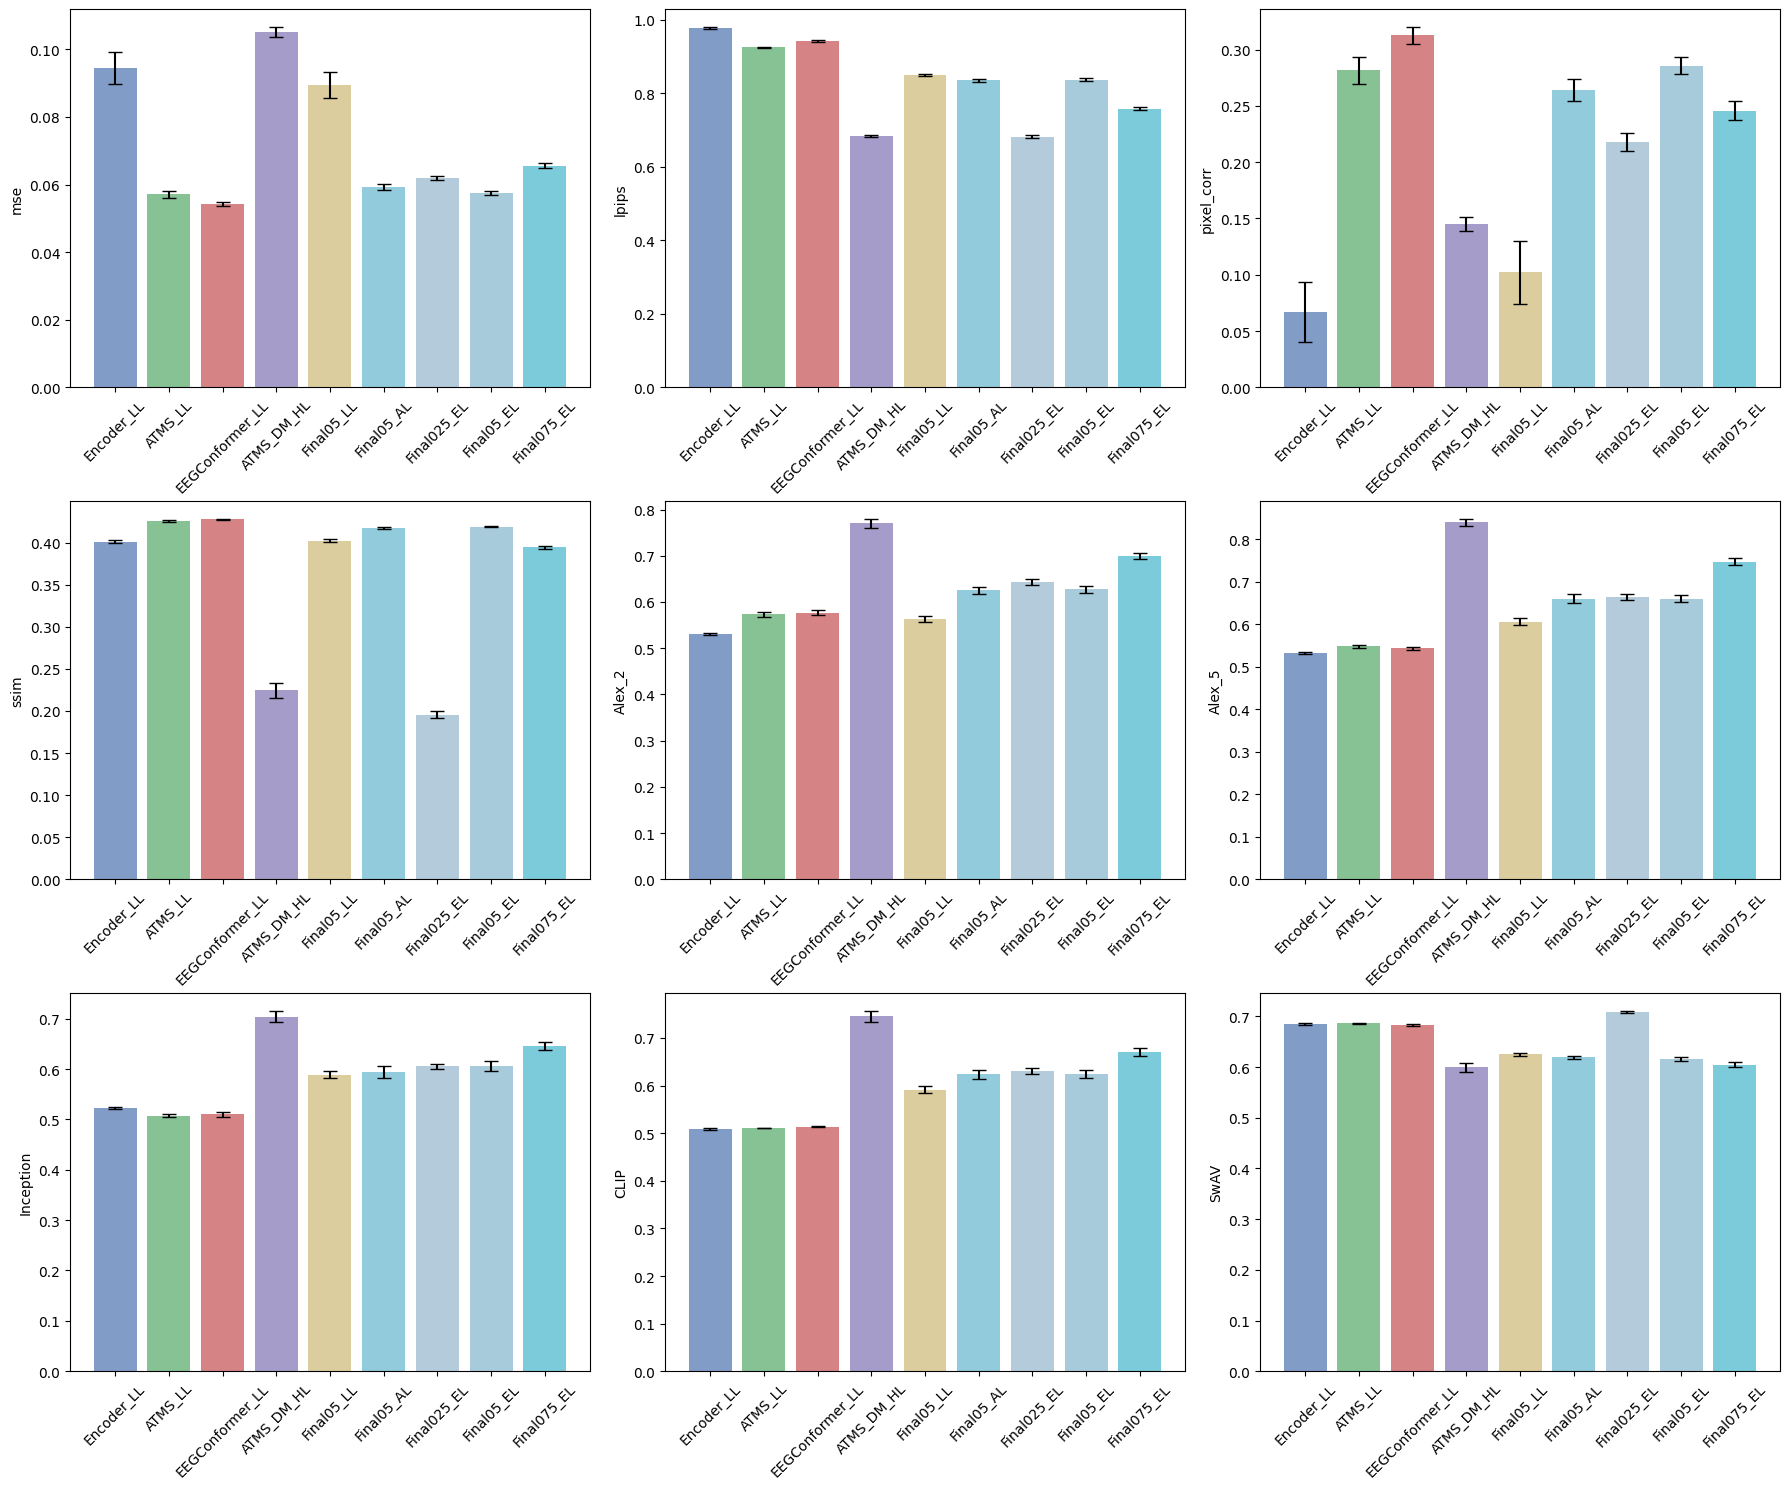

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Extract model types for plotting (we will average across subjects)
model_types = ['encoder_low_level', 'ATMS','EEGConformer',  
               'ATMS_DM_highlevel','Final05_encoder_low_level_DM_highlevel',
               'Final05_ATMS_DM_highlevel','Final025_EEGConformer_DM_highlevel','Final05_EEGConformer_DM_highlevel','Final075_EEGConformer_DM_highlevel']

# Define metrics to plot
metrics = ['mse', 'lpips', 'pixel_corr', 'ssim', 'Alex_2', 'Alex_5', 'Inception', 'CLIP', 'SwAV']

# Create a figure with subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# For consistent colors
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD','#94B5CD','#84B5CD','#44B5CD']

# For each metric, create a bar plot
for i, metric in enumerate(metrics):
    # Calculate mean and standard error for each model type
    metric_data = []
    errors = []
    
    for model in model_types:
        # if model == 'encoder_low_level':
        #     # Get data for encoder_low_level
        #     model_data = combined[combined['model_name'] == 'encoder_low_level'][metric]
        # elif model == 'ATMS':
        #     # Get data for ATMS without high-level or DM
        #     model_data = combined[(combined['model_name'] == 'ATMS') & 
        #                         (combined['is_highlevel'] == False)][metric]
        # elif model == 'EEGConformer':
        #     # Get data for EEGConformer
        #     model_data = combined[combined['model_name'] == 'EEGConformer'][metric]
        # elif model == 'ATMS_DM_highlevel':
        #     # Get data for ATMS with high-level and DM
        #     model_data = combined[combined['model_name'].str.contains('DM_highlevel')][metric]
        # elif model == 'Final05_encoder_low_level_DM_highlevel':
        #     # Get data for Final encoder_low_level with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_encoder_low_level_DM_highlevel'][metric]
        # elif model == 'Final05_ATMS_DM_highlevel':
        #     # Get data for Final ATMS with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_ATMS_DM_highlevel'][metric]
        # elif model == 'Final05_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_EEGConformer_DM_highlevel'][metric]
        # elif model == 'Final025_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final025_EEGConformer_DM_highlevel'][metric]
        # elif model == 'Final075_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final075_EEGConformer_DM_highlevel'][metric]
        # else:
        #     # If model type is not recognized, skip
        #     continue
        model_data = combined[combined['model_name'] == model][metric]
        metric_data.append(model_data.mean())
        # Calculate standard deviation for error bars
        errors.append(model_data.sem())  # Standard deviation
        # errors.append(model_data.std() / np.sqrt(len(model_data)))  # Standard error
    
    # Create bar plot on the appropriate subplot
    ax = axes[i]
    bars = ax.bar(model_types, metric_data, color=colors, alpha=0.7)
    
    # Add error bars
    ax.errorbar(model_types, metric_data, yerr=errors, fmt='none', color='black', capsize=5)
    
    # Customize the plot
    # ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylabel(f'{metric}')
    ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL', 
                'ATMS_DM_HL','Final05_LL','Final05_AL','Final025_EL','Final05_EL','Final075_EL'], 
                      rotation=45, ha='center')
    
    
    # # Add value labels on top of bars
    # for j, bar in enumerate(bars):
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
    #             f'{height:.3f}', ha='center', va='bottom', fontsize=10,fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Add a main title
# plt.suptitle('Model Performance Metrics Comparison', fontsize=16, y=1.02)

plt.show()

Plot saved to ./Figures/Fig2_metrics.svg


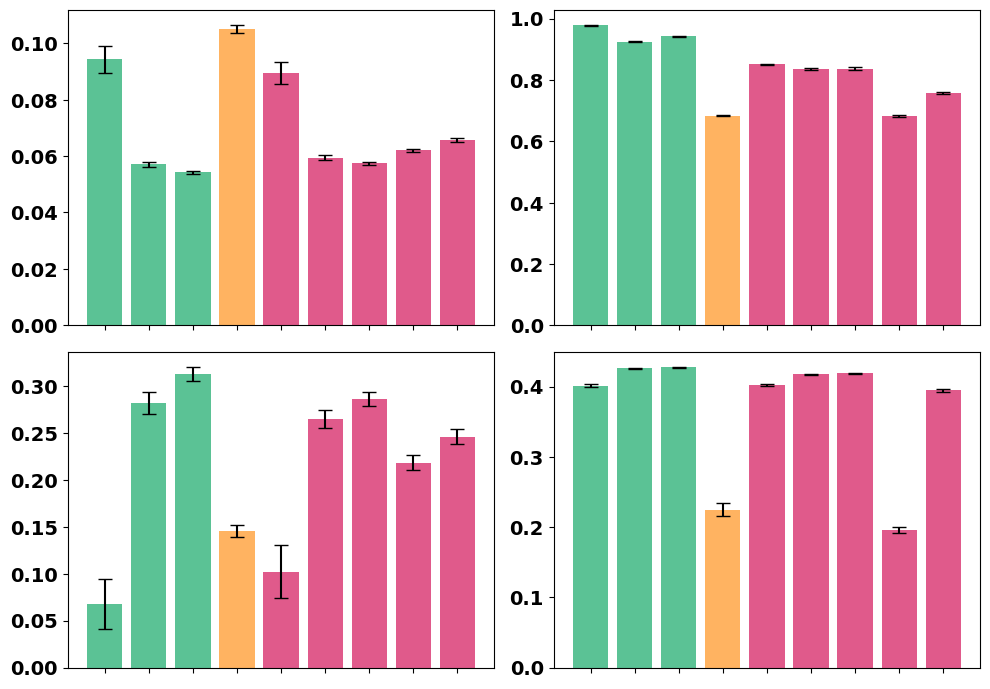

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

# Extract model types for plotting (we will average across subjects)
model_types = ['encoder_low_level', 'ATMS','EEGConformer',  
               'ATMS_DM_highlevel','Final05_encoder_low_level_DM_highlevel',
               'Final05_ATMS_DM_highlevel','Final05_EEGConformer_DM_highlevel','Final025_EEGConformer_DM_highlevel','Final075_EEGConformer_DM_highlevel']

# Define metrics to plot
metrics = ['mse', 'lpips', 'pixel_corr', 'ssim']

# Create a figure with subplots for each metric
# plt.rcParams['ytick.labelsize'] = 10
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes = axes.flatten()

# For consistent colors
colors = ['#15A868', '#15A868', '#15A868', '#FF931E','#D4145A', '#D4145A', '#D4145A','#D4145A','#D4145A']

# For each metric, create a bar plot
for i, metric in enumerate(metrics):
    # Calculate mean and standard error for each model type
    metric_data = []
    errors = []
    
for i, metric in enumerate(metrics):
    # Calculate mean and standard error for each model type
    metric_data = []
    errors = []
    
    for model in model_types:
        # if model == 'encoder_low_level':
        #     # Get data for encoder_low_level
        #     model_data = combined[combined['model_name'] == 'encoder_low_level'][metric]
        # elif model == 'ATMS':
        #     # Get data for ATMS without high-level or DM
        #     model_data = combined[(combined['model_name'] == 'ATMS') & 
        #                         (combined['is_highlevel'] == False)][metric]
        # elif model == 'EEGConformer':
        #     # Get data for EEGConformer
        #     model_data = combined[combined['model_name'] == 'EEGConformer'][metric]
        # elif model == 'ATMS_DM_highlevel':
        #     # Get data for ATMS with high-level and DM
        #     model_data = combined[combined['model_name'].str.contains('DM_highlevel')][metric]
        # elif model == 'Final05_encoder_low_level_DM_highlevel':
        #     # Get data for Final encoder_low_level with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_encoder_low_level_DM_highlevel'][metric]
        # elif model == 'Final05_ATMS_DM_highlevel':
        #     # Get data for Final ATMS with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_ATMS_DM_highlevel'][metric]
        # elif model == 'Final05_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final05_EEGConformer_DM_highlevel'][metric]
        # elif model == 'Final025_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final025_EEGConformer_DM_highlevel'][metric]
        # elif model == 'Final075_EEGConformer_DM_highlevel':
        #     # Get data for Final EEGConformer with DM high-level
        #     model_data = combined[combined['model_name'] == 'Final075_EEGConformer_DM_highlevel'][metric]
        # else:
        #     # If model type is not recognized, skip
        #     continue
        model_data = combined[combined['model_name'] == model][metric]
        metric_data.append(model_data.mean())
        # Calculate standard deviation for error bars
        errors.append(model_data.sem())  # Standard deviation
    
    # Create bar plot on the appropriate subplot
    ax = axes[i]
    bars = ax.bar(model_types, metric_data, color=colors, alpha=0.7)
    
    # Add error bars
    ax.errorbar(model_types, metric_data, yerr=errors, fmt='none', color='black', capsize=5)
    
    # Customize the plot
    # ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
    # ax.set_ylabel(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_xticklabels([]) 

    # ax.set_xticklabels(['Encoder_LL', 'ATMS_LL','EEGConformer_LL', 
    #             'ATMS_DM_HL','Final05_LL','Final05_AL','Final05_EL','Final025_EL','Final075_EL'], 
    #                   rotation=45, ha='center')

    # set the y-axis ticks to be bold
    # ax.tick_params(axis='y', labelsize=12, fontweight='bold')

    # # Add value labels on top of bars
    # for j, bar in enumerate(bars):
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
    #             f'{height:.3f}', ha='center', va='bottom', fontsize=10,fontweight='bold')

# Adjust layout

plt.tight_layout()
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.xticks([])
# plt.subplots_adjust(hspace=0.3)

# plt.rcParams['ytick.color'] = 'black'  # Optional
# plt.rcParams['font.weight'] = 'bold'


# Add a main title
# plt.suptitle('Model Performance Metrics Comparison', fontsize=16, y=1.02)
# plt.suptitle('Model Performance Metrics Comparison - Individual Subject Lines', fontsize=16, y=1.02)

save_path='./Figures'
if not os.path.exists(save_path):
    os.makedirs(save_path)
full_path = os.path.join(save_path, 'Fig2_metrics.svg')
plt.savefig(full_path, format='svg', bbox_inches='tight')
print(f"Plot saved to {full_path}")

plt.show()

/tmp/ipykernel_385924/164770212.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(subject_ids))


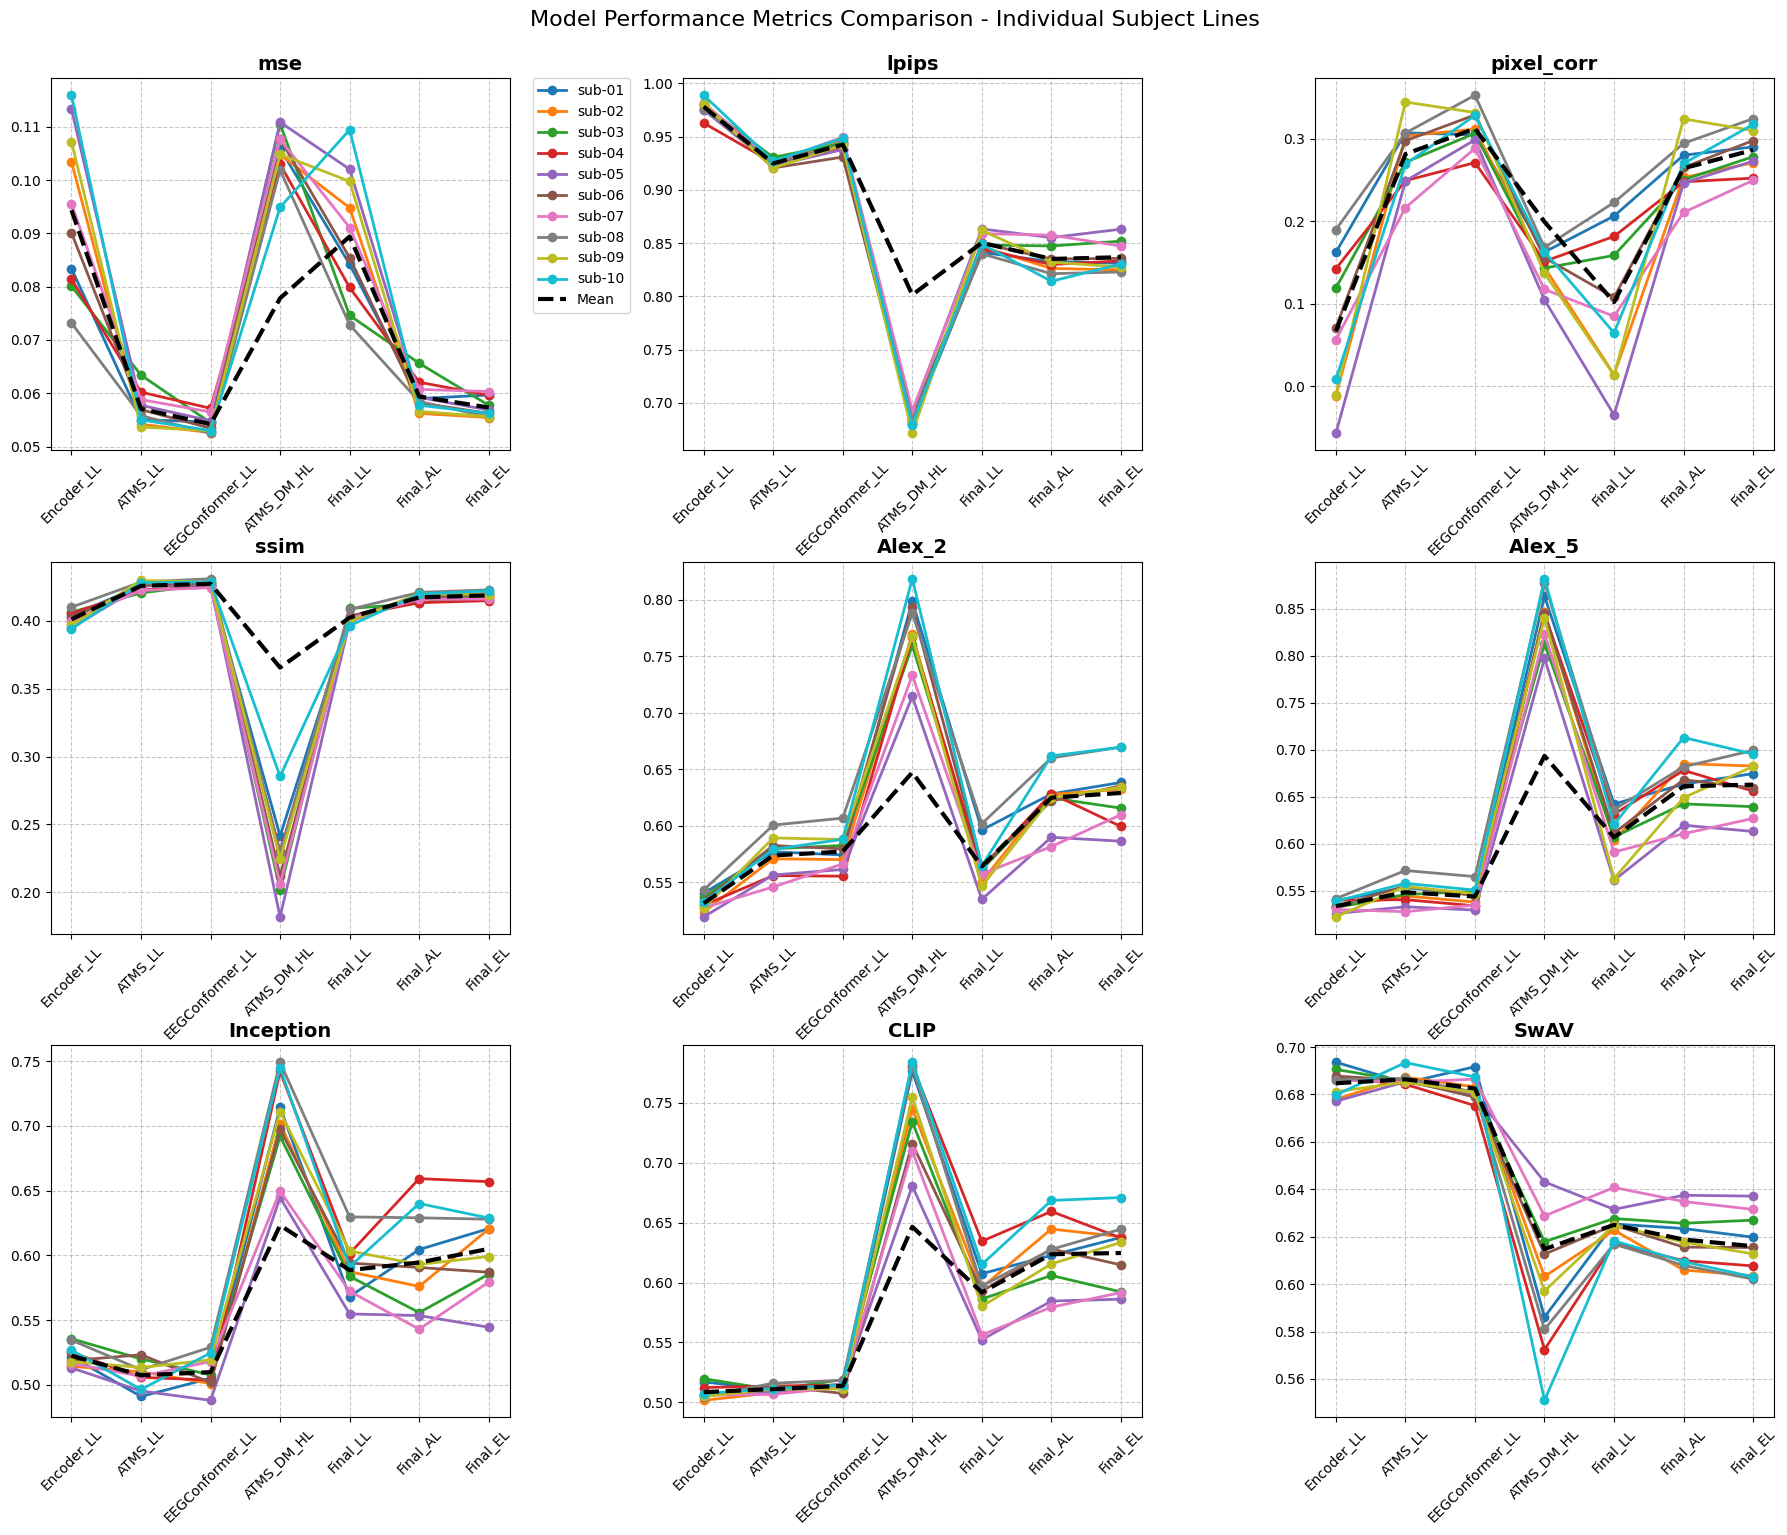

In [ ]:

import matplotlib.pyplot as plt
# Create a figure with subplots for each metric
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Define metrics to plot
# metrics = ['mse', 'lpips', 'pixel_corr', 'ssim', 'Alex_2', 'Alex_5', 'Inception', 'CLIP', 'SwAV']
metrics = ['mse', 'lpips', 'pixel_corr', 'ssim', 'Alex_2', 'Alex_5', 'Inception', 'CLIP', 'SwAV']

# Get subject IDs
subject_ids = combined['subject_id'].unique()

# Create a color map for subjects
cmap = plt.cm.get_cmap('tab10', len(subject_ids))
subject_colors = {subject: cmap(i) for i, subject in enumerate(subject_ids)}

# Define model types
model_types = ['encoder_low_level', 'ATMS','EEGConformer',  
               'ATMS_DM_highlevel','Final_encoder_low_level_DM_highlevel',
               'Final_ATMS_DM_highlevel','Final_EEGConformer_DM_highlevel']

model_labels = ['Encoder_LL', 'ATMS_LL','EEGConformer_LL', 
                'ATMS_DM_HL','Final_LL','Final_AL','Final_EL']

# For each metric, create a line plot
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Plot individual subject lines
    for subject in subject_ids:
        subject_data = []
        
        for model in model_types:
            if model == 'encoder_low_level':
                data = combined[(combined['model_name'] == 'encoder_low_level') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'ATMS':
                data = combined[(combined['model_name'] == 'ATMS') & 
                             (combined['is_highlevel'] == False) & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'EEGConformer':
                data = combined[(combined['model_name'] == 'EEGConformer') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'ATMS_DM_highlevel':
                data = combined[(combined['model_name'].str.contains('DM_highlevel')) & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_encoder_low_level_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_encoder_low_level_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_ATMS_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_ATMS_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_EEGConformer_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_EEGConformer_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            
            if not data.empty:
                subject_data.append(data.values[0])
            else:
                subject_data.append(None)
        
        # Plot line for this subject
        ax.plot(range(len(model_types)), subject_data, 'o-', color=subject_colors[subject], 
                linewidth=2,label=subject if i == 0 else None)
    
    # Calculate mean values for each model type
    mean_values = []
    for model in model_types:
        if model == 'encoder_low_level':
            data = combined[combined['model_name'] == 'encoder_low_level'][metric]
        elif model == 'ATMS':
            data = combined[(combined['model_name'] == 'ATMS') & 
                         (combined['is_highlevel'] == False)][metric]
        elif model == 'EEGConformer':
            data = combined[combined['model_name'] == 'EEGConformer'][metric]
        elif model == 'ATMS_DM_highlevel':
            data = combined[combined['model_name'].str.contains('DM_highlevel')][metric]
        elif model == 'Final_encoder_low_level_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_encoder_low_level_DM_highlevel'][metric]
        elif model == 'Final_ATMS_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_ATMS_DM_highlevel'][metric]
        elif model == 'Final_EEGConformer_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_EEGConformer_DM_highlevel'][metric]
        mean_values.append(data.mean())
    
    # Plot mean line (thicker, black)
    ax.plot(range(len(model_types)), mean_values, '--', color='black', 
            linewidth=3, markersize=8, label='Mean' if i == 0 else None)
    
    # Customize the plot
    ax.set_title(metric, fontsize=14, fontweight='bold')
    # ax.set_ylabel(f'{metric} value')
    ax.set_xticks(range(len(model_types)))
    ax.set_xticklabels(model_labels, rotation=45, ha='center')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Only add legend to the first plot
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.suptitle('Model Performance Metrics Comparison - Individual Subject Lines', fontsize=16, y=1.02)

plt.show()

/tmp/ipykernel_387394/746156616.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(subject_ids))


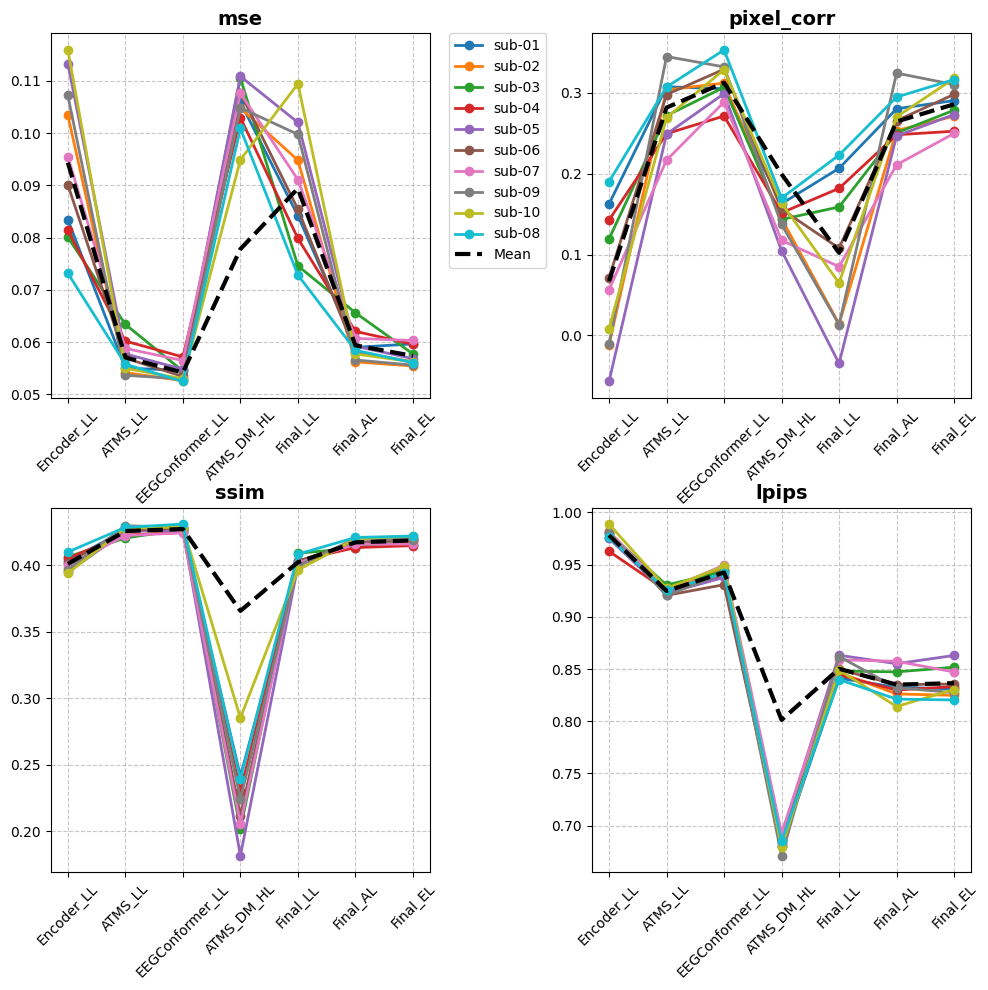

In [20]:
import os
import matplotlib.pyplot as plt
# Create a figure with subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

# Define metrics to plot
# metrics = ['mse', 'lpips', 'pixel_corr', 'ssim', 'Alex_2', 'Alex_5', 'Inception', 'CLIP', 'SwAV']
metrics = ['mse', 'pixel_corr', 'ssim','lpips']

# Get subject IDs
subject_ids = combined['subject_id'].unique()

# Create a color map for subjects
cmap = plt.cm.get_cmap('tab10', len(subject_ids))
subject_colors = {subject: cmap(i) for i, subject in enumerate(subject_ids)}

# Define model types
model_types = ['encoder_low_level', 'ATMS','EEGConformer',  
               'ATMS_DM_highlevel','Final_encoder_low_level_DM_highlevel',
               'Final_ATMS_DM_highlevel','Final_EEGConformer_DM_highlevel']

model_labels = ['Encoder_LL', 'ATMS_LL','EEGConformer_LL', 
                'ATMS_DM_HL','Final_LL','Final_AL','Final_EL']

# For each metric, create a line plot
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Plot individual subject lines
    for subject in subject_ids:
        subject_data = []
        
        for model in model_types:
            if model == 'encoder_low_level':
                data = combined[(combined['model_name'] == 'encoder_low_level') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'ATMS':
                data = combined[(combined['model_name'] == 'ATMS') & 
                             (combined['is_highlevel'] == False) & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'EEGConformer':
                data = combined[(combined['model_name'] == 'EEGConformer') & 
                             (combined['subject_id'] == subject)][metric]    
            elif model == 'ATMS_DM_highlevel':
                data = combined[(combined['model_name'].str.contains('DM_highlevel')) & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_encoder_low_level_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_encoder_low_level_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_ATMS_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_ATMS_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            elif model == 'Final_EEGConformer_DM_highlevel':
                data = combined[(combined['model_name'] == 'Final_EEGConformer_DM_highlevel') & 
                             (combined['subject_id'] == subject)][metric]
            
            if not data.empty:
                subject_data.append(data.values[0])
            else:
                subject_data.append(None)
        
        # Plot line for this subject
        ax.plot(range(len(model_types)), subject_data, 'o-', color=subject_colors[subject], 
                linewidth=2,label=subject if i == 0 else None)
    
    # Calculate mean values for each model type
    mean_values = []
    for model in model_types:
        if model == 'encoder_low_level':
            data = combined[combined['model_name'] == 'encoder_low_level'][metric]
        elif model == 'ATMS':
            data = combined[(combined['model_name'] == 'ATMS') & 
                         (combined['is_highlevel'] == False)][metric]
        elif model == 'EEGConformer':
            data = combined[combined['model_name'] == 'EEGConformer'][metric]
        elif model == 'ATMS_DM_highlevel':
            data = combined[combined['model_name'].str.contains('DM_highlevel')][metric]
        elif model == 'Final_encoder_low_level_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_encoder_low_level_DM_highlevel'][metric]
        elif model == 'Final_ATMS_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_ATMS_DM_highlevel'][metric]
        elif model == 'Final_EEGConformer_DM_highlevel':
            data = combined[combined['model_name'] == 'Final_EEGConformer_DM_highlevel'][metric]
        mean_values.append(data.mean())
    
    # Plot mean line (thicker, black)
    ax.plot(range(len(model_types)), mean_values, '--', color='black', 
            linewidth=3, markersize=8, label='Mean' if i == 0 else None)
    
    # Customize the plot
    ax.set_title(metric, fontsize=14, fontweight='bold')
    # ax.set_ylabel(f'{metric} value')
    ax.set_xticks(range(len(model_types)))
    ax.set_xticklabels(model_labels, rotation=45, ha='center')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Only add legend to the first plot
    if i == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
# plt.suptitle('Model Performance Metrics Comparison - Individual Subject Lines', fontsize=16, y=1.02)
# save_path='./Figures'
# if not os.path.exists(save_path):
#     os.makedirs(save_path)
# full_path = os.path.join(save_path, 'Fig2_metrics.svg')
# plt.savefig(full_path, format='svg', bbox_inches='tight')
# print(f"Plot saved to {full_path}")

plt.show()